# Business Problem Understanding
The objective of this problem is to predict the profit of a company based on market spends, administration, research & development and location of the company.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Understanding the Data

In [2]:
df=pd.read_csv("startup.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.shape

(50, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
#Checking for null values
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# Feature Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["State"]=le.fit_transform(df["State"])
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     int32  
 4   Profit           50 non-null     float64
dtypes: float64(4), int32(1)
memory usage: 1.9 KB


# Exploratory Data Analysis

In [8]:
df.describe()

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,1.000000,112012.639200
std,45902.256482,28017.802755,122290.310726,0.832993,40306.180338
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,0.000000,90138.902500
50%,73051.080000,122699.795000,212716.240000,1.000000,107978.190000
75%,101602.800000,144842.180000,299469.085000,2.000000,139765.977500
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


<AxesSubplot:>

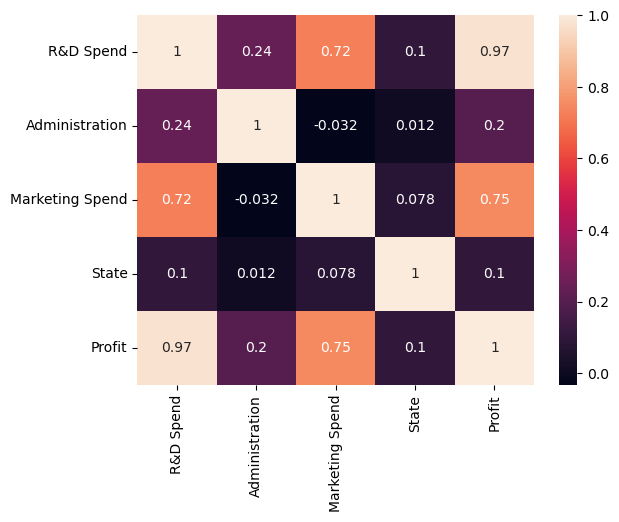

In [9]:
sns.heatmap(df.corr(),annot=True)

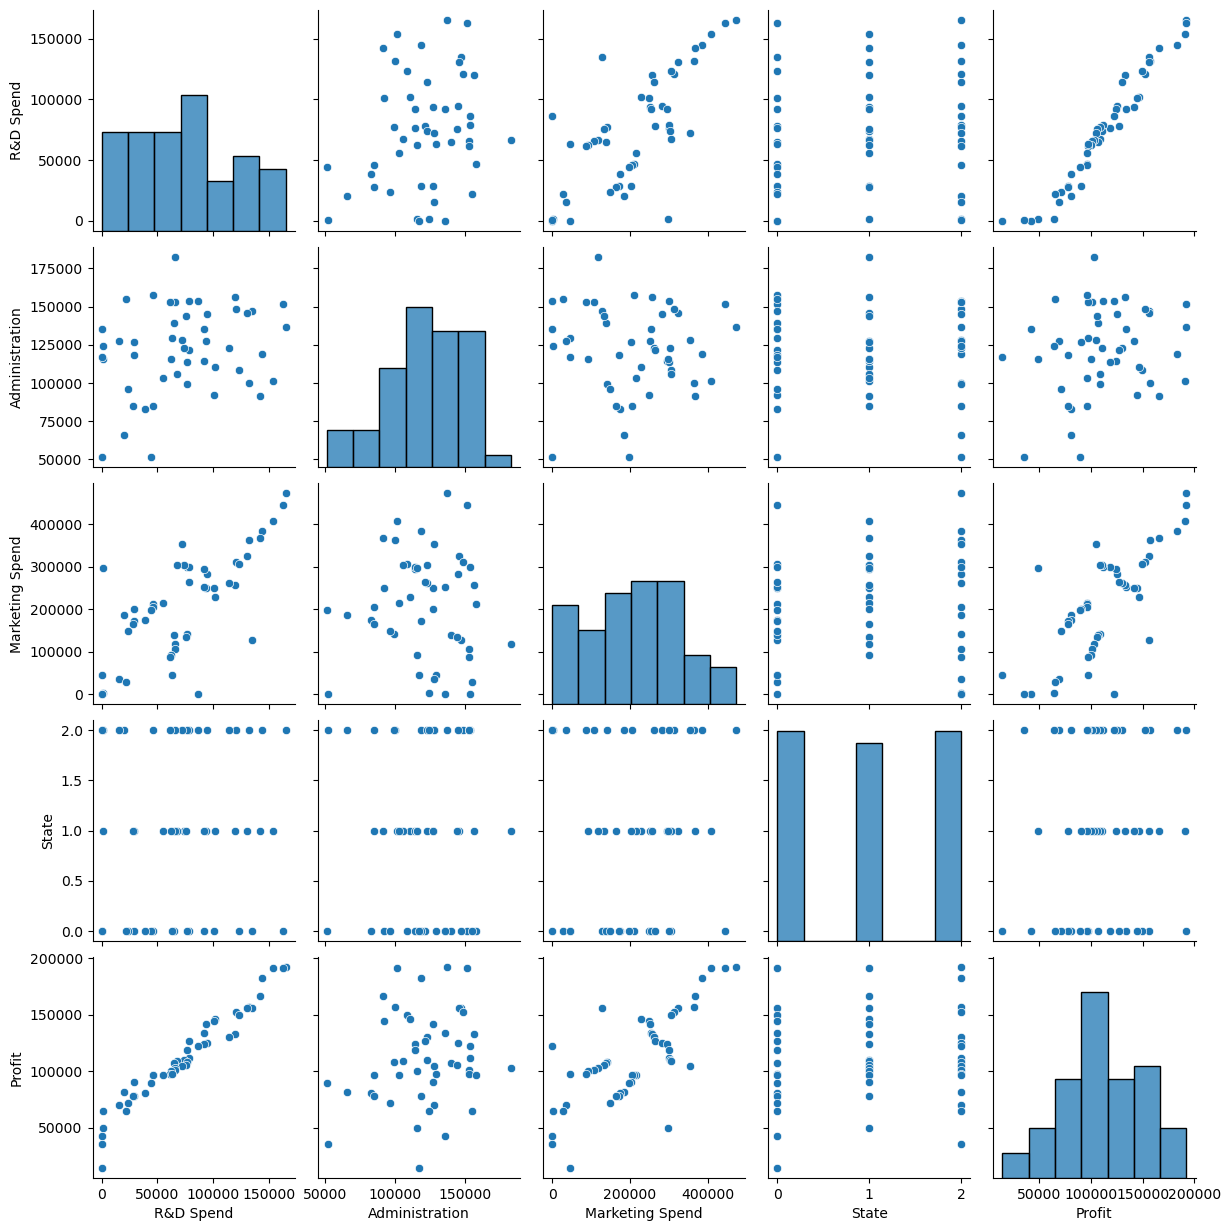

In [10]:
sns.pairplot(df)

In [11]:
#Creating x and y
x=df.drop(columns="Profit")
y=df["Profit"]

# Tranforming original data by adding Polynomial Features

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_converter=PolynomialFeatures(degree=2,include_bias=False)
x_poly=poly_converter.fit_transform(x)
x_poly=pd.DataFrame(x_poly)

# Train test split

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.3,random_state=42)

# Modelling(Linear Regression)

In [14]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#fit
model.fit(x_train,y_train)                                  

LinearRegression()

In [15]:
model.intercept_

58151.906015292334

In [16]:
model.coef_

array([ 1.08577108e+00, -4.81981474e-01,  7.24402640e-02,  1.30904454e+04,
       -4.70563266e-07, -2.08696375e-06,  3.59797067e-07, -7.87609705e-02,
        2.59626967e-06, -2.23319193e-07, -3.81609958e-02, -2.27070131e-08,
       -1.41834999e-02, -3.29650122e+02])

# Predictions

In [17]:
ypredtrain=model.predict(x_train)
ypredtest=model.predict(x_test)

# Evaluation

In [18]:
from sklearn.metrics import mean_squared_error
print("Train rmse:",np.sqrt(mean_squared_error(y_train,ypredtrain)))

Train rmse: 7590.143903181062


In [19]:
print("Train rmse:",np.sqrt(mean_squared_error(y_test,ypredtest)))

Train rmse: 11928.213397334843


In [20]:
#Train score
print("Train score:",model.score(x_train,y_train))

Train score: 0.9654905982884365


In [21]:
#Test score
print("Test score:",model.score(x_test,y_test))

Test score: 0.8988754975347739


# Choosing a model

# Bias-Variance Trade Off

In [22]:
train_rmse_errors=[]
test_rmse_errors=[]
for d in range(1,10):
    
    poly_converter=PolynomialFeatures(degree=d,include_bias=False)
    x_poly=poly_converter.fit_transform(x)
    
    x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.3,random_state=42)
    
    model=LinearRegression()
    model.fit(x_train,y_train)
    
    ypredtrain=model.predict(x_train)
    ypredtest=model.predict(x_test)
    
    train_rmse=np.sqrt(mean_squared_error(y_train,ypredtrain))
    train_rmse_errors.append(train_rmse)
    
    test_rmse=np.sqrt(mean_squared_error(y_test,ypredtest))
    test_rmse_errors.append(test_rmse)

In [23]:
train_rmse_errors

[9044.250207124778,
 7590.143903181062,
 2123.8570252137456,
 3.348392421757575e-05,
 6.990119099801702e-08,
 1.2911586891357925e-06,
 5.443418294404256e-07,
 1.7249413566364297e-06,
 6.989748466169163e-06]

In [24]:
test_rmse_errors

[9157.839682146294,
 11928.213397334843,
 37790.26913525596,
 139370.67154794795,
 1265052.1350584154,
 8740884.407173352,
 10023885.528915683,
 7578649.678851099,
 4401313.24711055]

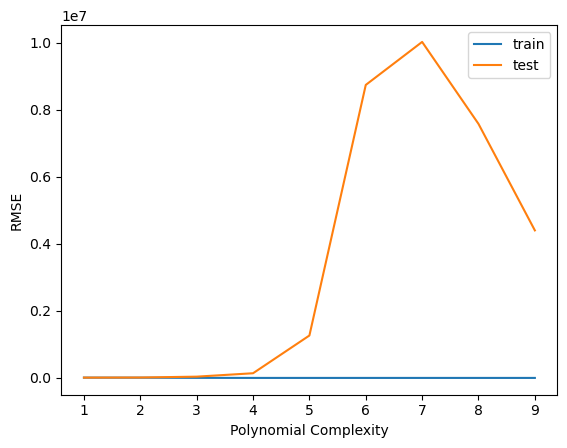

In [25]:
plt.plot(range(1,10),train_rmse_errors,label="train")
plt.plot(range(1,10),test_rmse_errors,label="test")
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()
plt.show()

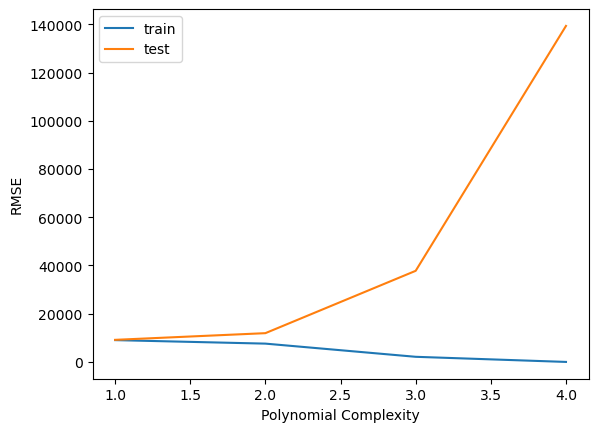

In [26]:
plt.plot(range(1,5),train_rmse_errors[:4],label="train")
plt.plot(range(1,5),test_rmse_errors[:4],label="test")
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()
plt.show()

The meeting point is 1 , hence build the final model with degree=1

# Finalizing the Model 

In [27]:
final_poly_converter=PolynomialFeatures(degree=1,include_bias=False)

x_poly=final_poly_converter.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.3,random_state=42)

final_model=LinearRegression()
final_model.fit(x_train,y_train)

ypredtrain=final_model.predict(x_train)
ypredtest=final_model.predict(x_test)

print("Train score:",final_model.score(x_train,y_train))

Train score: 0.9510015268301873


In [28]:
print("Test score:",final_model.score(x_test,y_test))

Test score: 0.9403937677548101
